<a href="https://colab.research.google.com/github/Stalaka/AI-Coursework-2025/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

RANDOM_STATE = 42
print('Setup complete')

Setup complete


In [12]:
import pandas as pd

csv_path = 'diamonds.csv'
df = pd.read_csv(csv_path)
df.head()




,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


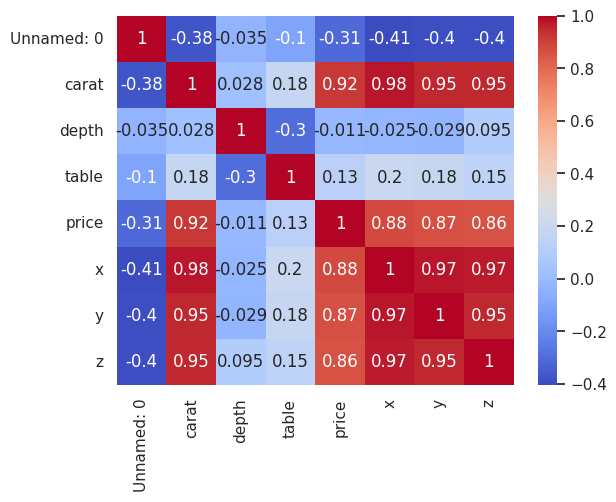

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Linear Regression Accuracy (R²):", r2)
print("MAE:", mae)
print("MSE:", mse)




Linear Regression Accuracy (R²): 0.9236528243496825
MAE: 724.6967857635161
MSE: 1210900.9482457414


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_num = diamonds_model[num_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.66727294 0.21219253]


In [19]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)

print("PCA-based model R²:", r2_score(y_test, y_pred_pca))


PCA-based model R²: 0.8055772996058582


In [20]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Lasso R²: 0.9236556385765575
Ridge R²: 0.9236351444857653


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.257e+09, tolerance: 1.577e+07
  model = cd_fast.enet_coordinate_descent(


In [21]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'PCA + Linear', 'Lasso', 'Ridge'],
    'R2 Score': [
        r2,
        r2_score(y_test, y_pred_pca),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ]
})
print(results)


               Model  R2 Score
0  Linear Regression  0.923653
1       PCA + Linear  0.805577
2              Lasso  0.923656
3              Ridge  0.923635
